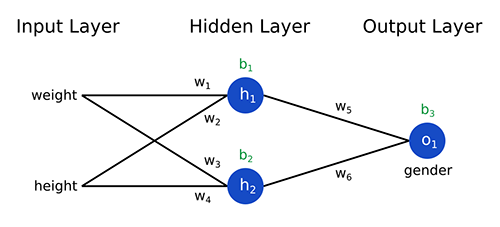

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
x_train = np.array([[150, 72],
                    [125, 55],
                    [115, 50],
                    [165, 75],
                    [180, 60],
                    [135, 56]])
                   
y_train = np.array([1,0,0,1,1,0])


## Scale Data using z = (x - m) / s  where m = mean, s = standard deviation

In [3]:
class scale:

  def mean(self, x):
    return x.sum(axis=0) / x_train.shape[0]

  def std(self, x):

    m = self.mean(x)

    x_minus_mean = x - m

    x_minus_mean2 = x_minus_mean ** 2

    summation = x_minus_mean2.sum(axis=0)

    divide_by_N = summation / (x_train.shape[0])

    standard_deviation = np.sqrt(divide_by_N)

    return standard_deviation

  def scale_data(self, x):
    return (x - self.mean(x)) / self.std(x)

scaler = scale()

In [4]:
print("MEAN = {}".format(scaler.mean(x_train)))
print("STD = {}".format(scaler.std(x_train)))

MEAN = [145.          61.33333333]
STD = [22.54624876  9.12262146]


In [5]:
x_train = scaler.scale_data(x_train)

print(x_train)

[[ 0.22176638  1.16925455]
 [-0.88706553 -0.69424489]
 [-1.33059829 -1.24233296]
 [ 0.88706553  1.4981074 ]
 [ 1.55236467 -0.14615682]
 [-0.44353276 -0.58462728]]


In [6]:
#x_train shape = 11x4
# x_train = np.array([[1.2, 4.3, 2.1, 1.9],
#                     [6.2, 8.3, 5.1, 9.9],
#                     [2.3, 4.3, 3.1, 0.9],
#                     [4.1, 4.4, 1.1, 0.3],
#                     [6.1, 7.1, 8.1, 9.1],
#                     [1.0, 2.0, 1.0, 1.0],
#                     [5.1, 5.1, 5.1, 5.1],
#                     [1.8, 4.0, 3.9, 2.7],
#                     [4.4, 0.8, 1.9, 2.7],
#                     [6.9, 8.8, 5.7, 7.1]])

# #y_train shape = 1x11
# y_train = np.array([[1,0],
#                     [0,1],
#                     [1,0],
#                     [1,0],
#                     [0,1],
#                     [1,0],
#                     [0,1],
#                     [1,0],
#                     [1,0],
#                     [0,1]])
     

In [7]:
class tinyNN:
  def __init__(self):
    
    np.random.seed(1)

    self.w1 = (2 * np.random.rand(2,50)) - 1
    self.w2 = (2 * np.random.rand(50,1)) - 1

    self.lr = .001

  def tanh(self, x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

  def derivTanh(self, x):
    return (4*np.exp(2*x)) / ((np.exp(2*x) + 1)**2)

  def sigmoid(self, x):
    return 1 / (1+np.exp(-x))

  def derivSigmoid(self, x):
    return np.exp(x) / (np.exp(x) + 1)**2

  def loss(self, y_pred, y_true):
    return (y_pred - y_true)**2

  def derivLoss(self, error):
    return error

  def forward(self, inputs):
    
    self.hidden = np.dot(inputs, self.w1)
    self.h1 = self.tanh(self.hidden)

    outputs = np.dot(self.h1, self.w2)
    
    return outputs

  def calcError(self, y_pred, y):

    return y_pred.T - y

  def backProp(self, error):

    dypred_dw2 = self.h1
    dse_dypred = error

    delta_w2 = np.dot(dypred_dw2.T, dse_dypred.T)

    dse_dh = np.dot(dse_dypred.T, self.w2.T)

    dh_dp = self.derivTanh(self.hidden)

    dse_dp = dse_dh * dh_dp

    delta_w1 = np.dot(x_train.T, dse_dp)

    self.w2 -= self.lr * delta_w2
    self.w1 -= self.lr * delta_w1


    

garvis = tinyNN()

In [8]:
for i in range(1000):

  outputs = garvis.forward(x_train)
  error = garvis.calcError(outputs, y_train)
  garvis.backProp(error)

outputs = garvis.forward(x_train)

print(outputs)

outputs = np.where(outputs >= .5, 1, 0)

outputs = np.where(outputs == 1, "Male", "Female")

print(outputs)

[[ 0.93975543]
 [-0.02139624]
 [-0.12630504]
 [ 0.84544591]
 [ 0.9055826 ]
 [-0.19441367]]
[['Male']
 ['Female']
 ['Female']
 ['Male']
 ['Male']
 ['Female']]
